In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
df=pd.DataFrame(pd.read_csv("user_behavior_dataset.csv"))
pd.set_option("display.max_columns",None)

In [3]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [4]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

There is no null data present in the dataset. The data is already cleaned

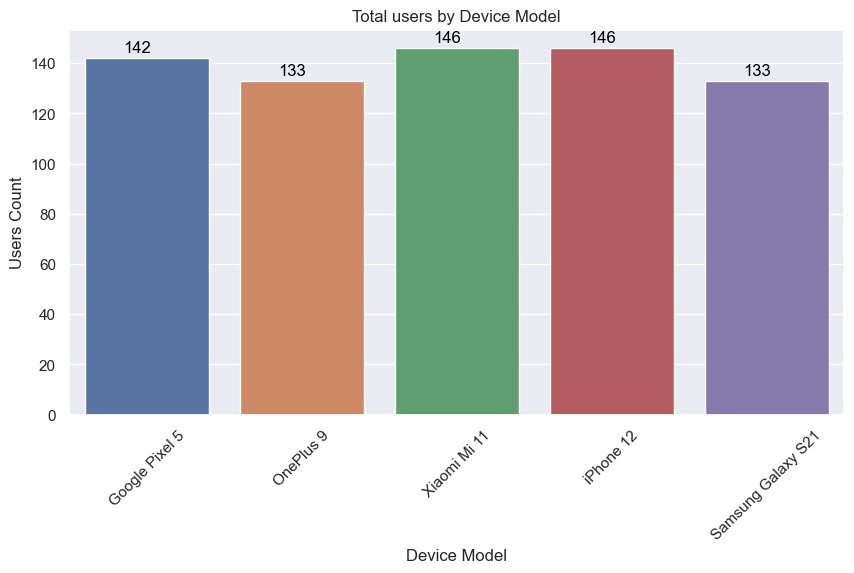

In [5]:
#plotting the total users by device model
plt.figure(figsize=(10,5))
plt.title("Total users by Device Model")
ax=sns.countplot(x="Device Model",data=df)
plt.xlabel("Device Model")
plt.ylabel("Users Count")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),va="bottom",color="black")

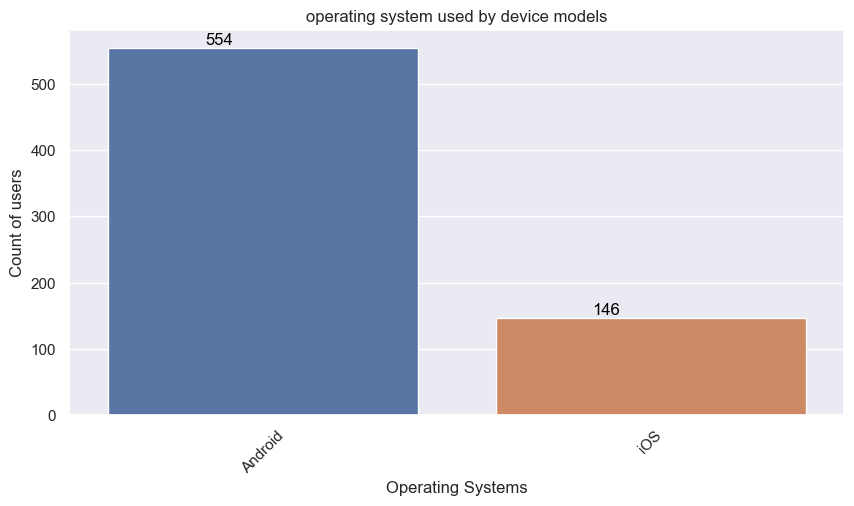

In [6]:
#plotting the device models vs operating systems
plt.figure(figsize=(10,5))
plt.title("operating system used by device models")
ax=sns.countplot(x="Operating System",data=df)
plt.xlabel("Operating Systems")
plt.ylabel("Count of users")
plt.xticks(rotation=45)
for x in ax.patches:
    ax.annotate(int(x.get_height()),(x.get_x()+0.25,x.get_height()+1),va="bottom",color="black")

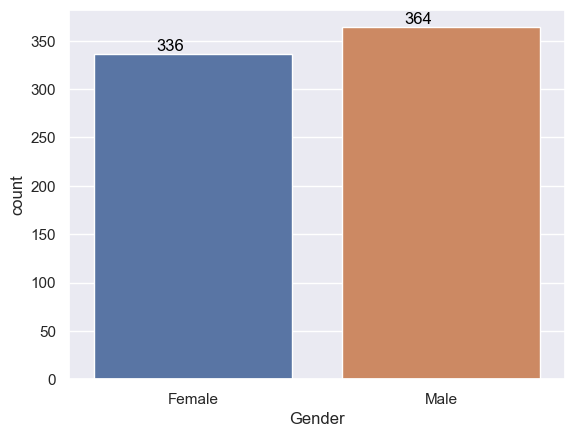

In [7]:
#plotting the graph for user count by gender
ax = sns.countplot(x="Gender",data=df.sort_values("User ID",ascending=False))
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),va="bottom",color="black")
plt.show()


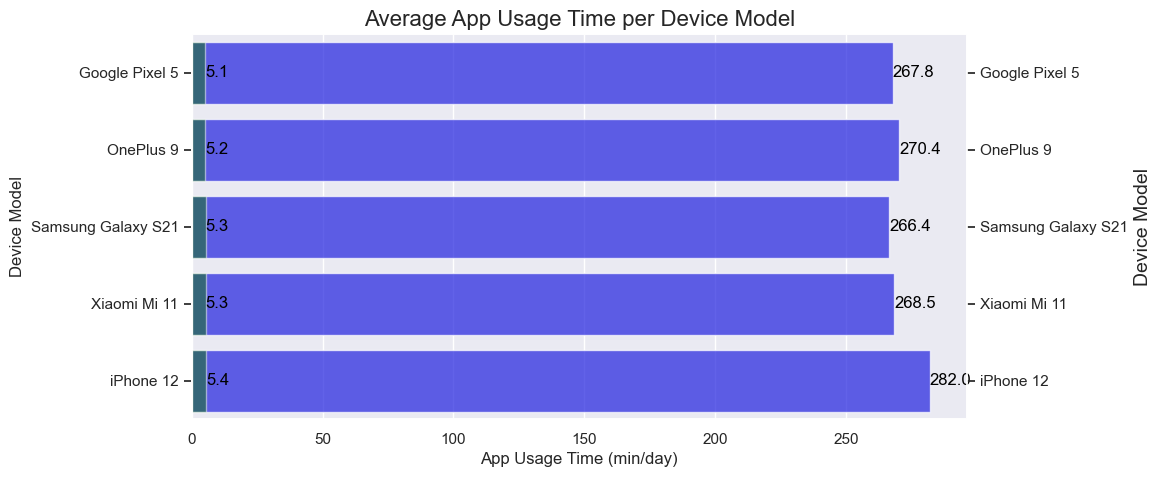

In [8]:
#plotting the average app usage time for each device model
device_app_usage=df.groupby('Device Model')[['App Usage Time (min/day)','Screen On Time (hours/day)']].mean()
plt.figure(figsize=(10,5))
ax=sns.barplot(x=device_app_usage['App Usage Time (min/day)'],y=device_app_usage.index,color="blue",alpha=0.7)
for index,values in enumerate(device_app_usage['App Usage Time (min/day)']):
    ax.text(values,index,f'{values:0.1f}',va="center",color="black")
ax1 = ax.twinx()    
sns.barplot(x=device_app_usage['Screen On Time (hours/day)'],y=device_app_usage.index,color="green",alpha=0.5,ax=ax1)  
for index,values in enumerate(device_app_usage['Screen On Time (hours/day)']):
    ax1.text(values,index,f'{values:0.1f}',va="center",color="black")
plt.title('Average App Usage Time per Device Model', fontsize=16)
plt.xlabel('App Usage Time (min/day)', fontsize=14)
plt.ylabel('Device Model', fontsize=14)
plt.show()


Observations:
#in terms of App usage time(min/day) (blue colour graph)
1.from the above graph the user who have iPhone 12 uses more app usage time(min/day) compared to all other devices.
2.remaining all device users use similarly same time with a small difference f 1-3 minutes.
#in terms of Screen On TIme(hours/day) (green colour graph)
1.most screen time is used by iPhone Users
2.least screen time is used by Google Pixel 5 users
3.the screen time of all users(considering all devices) use above 5 hours/day

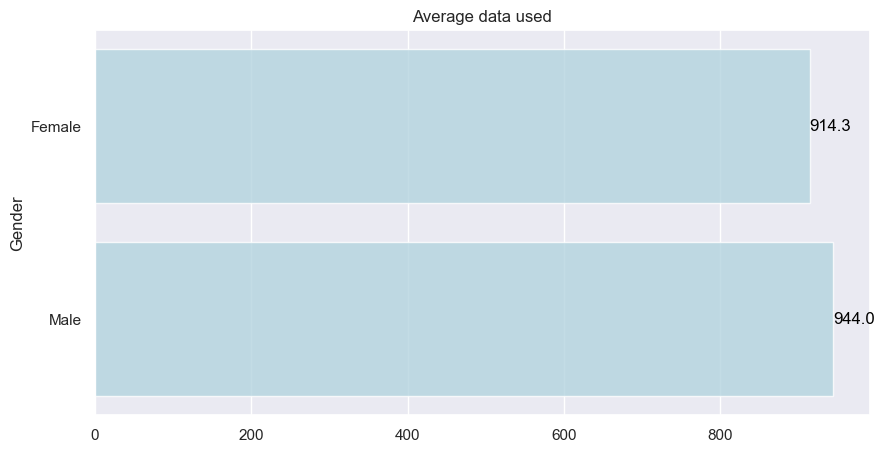

In [9]:
#data usage by gender
data_usage=df.groupby('Gender')['Data Usage (MB/day)'].mean().sort_values()
plt.figure(figsize=(10,5))
plt.title("Average data used")
ax=sns.barplot(x=data_usage.values,y=data_usage.index,color="lightblue",alpha=0.8)
for index,values in enumerate(data_usage.values):
    ax.text(values,index,f'{values:0.1f}',va="center",color="black")
plt.show()    

In [10]:
device_age_table = df.pivot_table(index="Age", columns="Device Model", values="User ID", aggfunc="count", fill_value=0)
device_age_table.loc['Total'] = device_age_table.sum()
device_age_table['Total'] = device_age_table.sum(axis=1)
device_age_table


Device Model,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,Total
Age,,,,,,
18,3,0,4,3,1,11
19,1,3,1,4,3,12
20,5,2,4,1,5,17
21,5,2,2,6,2,17
22,5,3,4,4,8,24
23,3,3,3,1,5,15
24,3,6,2,3,0,14
25,7,3,4,4,3,21
26,2,4,3,3,2,14


Gender
Female    271.967262
Male      270.354396
Name: App Usage Time (min/day), dtype: float64


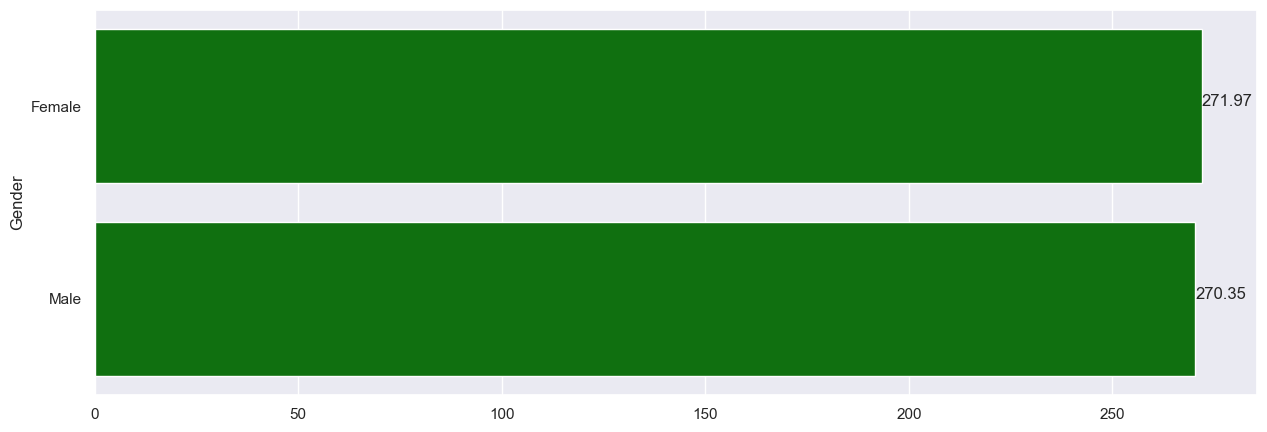

In [11]:
avg_app_usage_gender = df.groupby('Gender')['App Usage Time (min/day)'].mean()
print(avg_app_usage_gender)
plt.figure(figsize=(15,5))
plt.title("")
ax=sns.barplot(x=avg_app_usage_gender.values,y=avg_app_usage_gender.index,color="green")
for index,value in enumerate(avg_app_usage_gender.values):
    ax.text(value,index,f'{value:0.2f}')

Device Model
Google Pixel 5        1475.676056
OnePlus 9             1523.849624
Samsung Galaxy S21    1504.571429
Xiaomi Mi 11          1528.876712
iPhone 12             1589.513699
Name: Battery Drain (mAh/day), dtype: float64


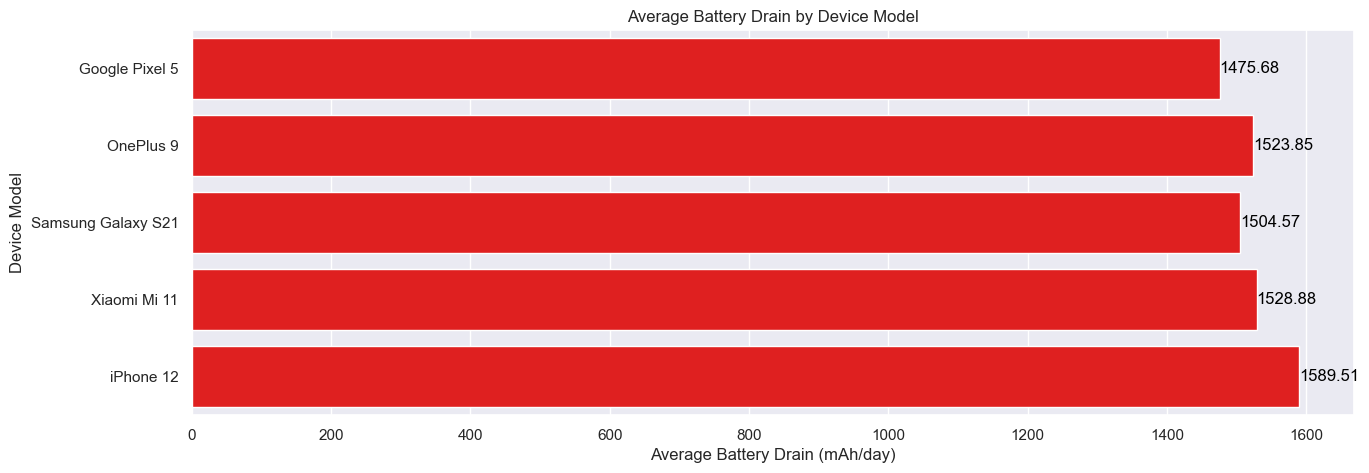

In [12]:
avg_battery_drain = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean()
print(avg_battery_drain)

plt.figure(figsize=(15, 5))
plt.title("Average Battery Drain by Device Model")
ax = sns.barplot(x=avg_battery_drain.values, y=avg_battery_drain.index, color="red")
for index, value in enumerate(avg_battery_drain.values):
    ax.text(value, index, f'{value:0.2f}', va="center", color="black")
plt.xlabel("Average Battery Drain (mAh/day)")
plt.show()


User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64


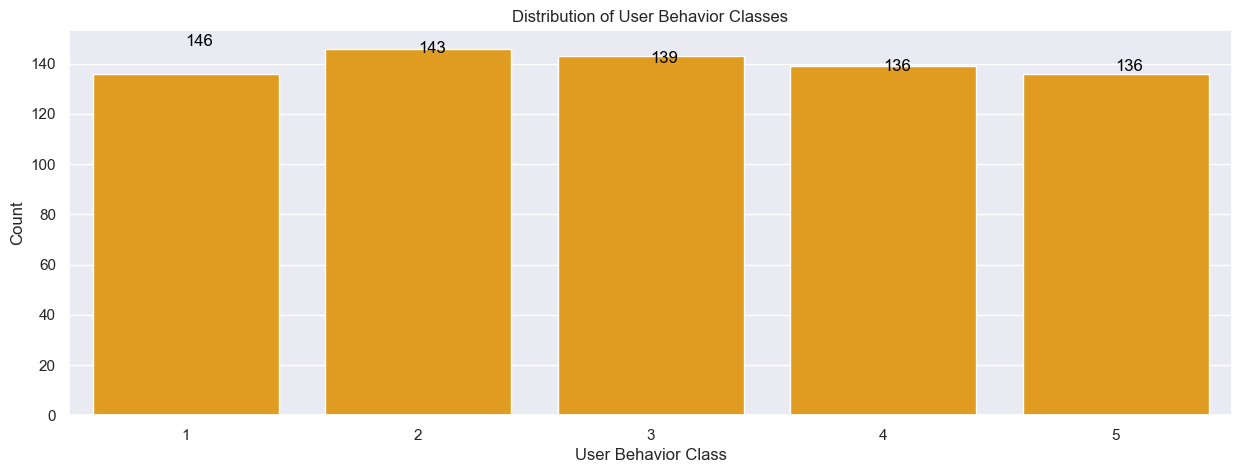

In [13]:
behavior_distribution = df['User Behavior Class'].value_counts()
print(behavior_distribution)

plt.figure(figsize=(15, 5))
plt.title("Distribution of User Behavior Classes")
ax = sns.barplot(x=behavior_distribution.index, y=behavior_distribution.values, color="orange")
for index, value in enumerate(behavior_distribution.values):
    ax.text(index, value, f'{value}', va="bottom", color="black")
plt.xlabel("User Behavior Class")
plt.ylabel("Count")
plt.show()


In [14]:
age_data_usage = df.groupby('Age')['Data Usage (MB/day)'].mean()
print(age_data_usage)
print(age_data_usage.min())
print(age_data_usage.max())

Age
18     998.454545
19     875.333333
20    1033.117647
21    1159.705882
22    1133.291667
23     887.400000
24     867.928571
25     786.904762
26     839.428571
27     864.583333
28     827.384615
29     763.952381
30     726.733333
31    1043.100000
32     759.777778
33     980.090909
34    1163.720000
35    1012.133333
36     704.529412
37     982.894737
38    1001.333333
39     995.866667
40     882.052632
41     732.250000
42     725.850000
43     771.136364
44     841.285714
45     918.500000
46     823.090909
47    1258.352941
48    1170.333333
49    1181.352941
50     847.400000
51     967.400000
52    1066.411765
53     986.526316
54     807.125000
55     957.523810
56     875.875000
57     879.944444
58     840.785714
59    1050.384615
Name: Data Usage (MB/day), dtype: float64
704.5294117647059
1258.3529411764705


In [ ]:
observation:
1.the most average of datausage is used by the age group of 47
2.the least avg datausage is used by the age group of 36